## Set up environment

In [2]:
# Set up environment
import warnings;
warnings.filterwarnings('ignore');
from IPython.core.interactiveshell import InteractiveShell;
InteractiveShell.ast_node_interactivity = "all";
import pandas as pd
import os.path as op
import os
import numpy as np
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
import nipype.interfaces.freesurfer as fs
import csv
import scipy
from scipy import stats
from numpy import *
from matplotlib.lines import Line2D;
import s3fs
from sklearn import preprocessing
import statsmodels.formula.api as smf
import permutation_test as p
import statistics
import itertools

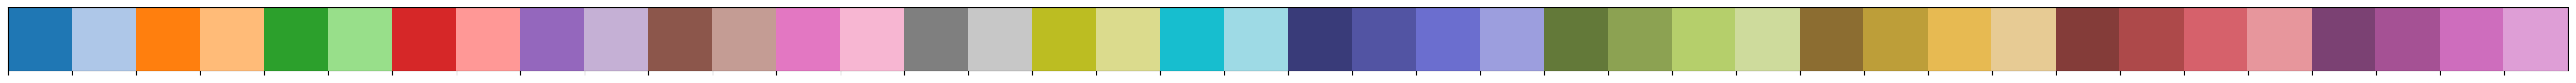

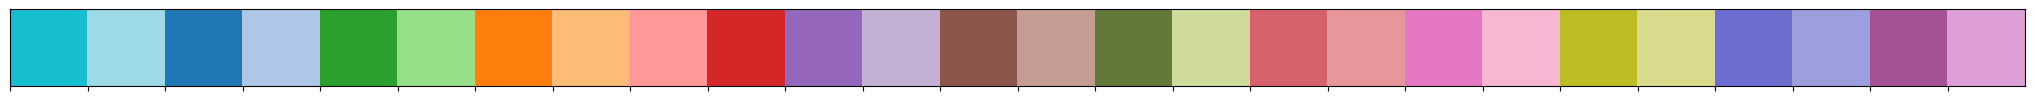

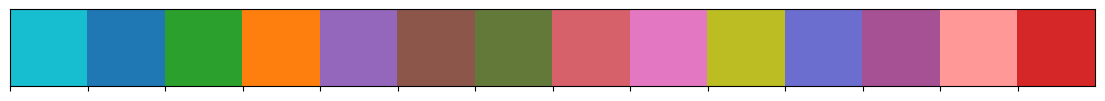

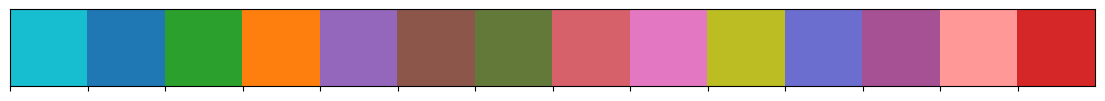

In [3]:
#plotting parameters, these will be the same for all plots

bundles = ['AFL', 'AFR', 'ATRL', 'ATRR', 'CCL', 'CCR', 'CSL', 'CSR', 'FcMi', 'FcMa', 'IFOFL', 'IFOFR', 'ILFL', 'ILFR', 
                  'MLFL', 'MLFR', 'ORL', 'ORR', 'SLFL', 'SLFR', 'UNCL', 'UNCR', 'VOFL', 'VOFR', 'pAFL', 'pAFR']    
rightBundles = ['AFR', 'ATRR', 'CCR', 'CSR', 'FcMi', 'FcMa', 'IFOFR', 'ILFR', 'MLFR', 'ORR', 'pAFR', 'SLFR', 'UNCR', 'VOFR']
leftBundles = ['AFL', 'ATRL', 'CCL', 'CSL', 'FcMi', 'FcMa', 'IFOFL', 'ILFL', 'MLFL', 'ORL', 'pAFL', 'SLFL', 'UNCL', 'VOFL']


tractPosHorz = {'AF': (0,0), 'ATR': (0, 1), 'CC': (0, 2), 'CS': (0, 3), 
            'IFOF':(1,0), 'ILF':(1,1), 'MLF':(1,2), 'OR': (1,3),
            'SLF': (2, 0),  'UNC':(2,1), 'VOF': (2, 2), 'pAF': (2,3),
            'FcMi': (3, 1), 'FcMa': (3, 2)};

tracts=['AF', 'ATR', 'CC', 'CS', 'IFOF', 'ILF', 'MLF', 'OR', 'SLF', 'UNC', 'VOF', 'pAF', 'FcMi', 'FcMa']
colors=['cyan', 'blue', 'green', 'orange', 'purple', 'brown', 'olive', 'coral', 'fuchsia', 'yellow', 'indigo', 'violet', 'salmon', 'red']

color_list_all=sns.color_palette("tab20")+sns.color_palette("tab20b") 
color_list_complete=color_list_all
color_list_chosen=color_list_all[18:20]
color_list_chosen.extend(color_list_all[0:2])
color_list_chosen.extend(color_list_all[4:6])
color_list_chosen.extend(color_list_all[2:4])
color_list_chosen.extend(color_list_all[7:8])
color_list_chosen.extend(color_list_all[6:7])
color_list_chosen.extend(color_list_all[8:10])
color_list_chosen.extend(color_list_all[10:12])
color_list_chosen.extend(color_list_all[24:25])
color_list_chosen.extend(color_list_all[27:28])
color_list_chosen.extend(color_list_all[34:35])
color_list_chosen.extend(color_list_all[35:36])
color_list_chosen.extend(color_list_all[12:14])
color_list_chosen.extend(color_list_all[16:18])
color_list_chosen.extend(color_list_all[22:23])
color_list_chosen.extend(color_list_all[23:24])
color_list_chosen.extend(color_list_all[37:38])
color_list_chosen.extend(color_list_all[39:40])

sns.palplot(color_list_all)
sns.palplot(color_list_chosen)
color_list_all=color_list_chosen
color_order=[19, 18, 1, 0, 5, 4, 3, 2, 7, 6, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22]

color_list_nohemis=sns.color_palette("tab20")+sns.color_palette("tab20b") 
color_list_complete_nohemis=color_list_nohemis
color_list_chosen_nohemis=color_list_nohemis[18:19]
color_list_chosen_nohemis.extend(color_list_nohemis[0:1])
color_list_chosen_nohemis.extend(color_list_nohemis[4:5])
color_list_chosen_nohemis.extend(color_list_nohemis[2:3])
color_list_chosen_nohemis.extend(color_list_nohemis[8:9])
color_list_chosen_nohemis.extend(color_list_nohemis[10:11])
color_list_chosen_nohemis.extend(color_list_nohemis[24:25])
color_list_chosen_nohemis.extend(color_list_nohemis[34:35])
color_list_chosen_nohemis.extend(color_list_nohemis[12:13])
color_list_chosen_nohemis.extend(color_list_nohemis[16:17])
color_list_chosen_nohemis.extend(color_list_nohemis[22:23])
color_list_chosen_nohemis.extend(color_list_nohemis[37:38])
color_list_chosen_nohemis.extend(color_list_nohemis[7:8])
color_list_chosen_nohemis.extend(color_list_nohemis[6:7])
sns.palplot(color_list_chosen_nohemis)

color_order2=[19, 18, 5, 4, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22, 7, 6]

color_list_3=sns.color_palette("tab20")+sns.color_palette("tab20b") 
color_list_complete3=color_list_3
color_list_chosen3=color_list_3[18:19]
color_list_chosen3.extend(color_list_3[0:1])
color_list_chosen3.extend(color_list_3[4:5])
color_list_chosen3.extend(color_list_3[2:3])
color_list_chosen3.extend(color_list_3[8:9])
color_list_chosen3.extend(color_list_3[10:11])
color_list_chosen3.extend(color_list_3[24:25])
color_list_chosen3.extend(color_list_3[34:35])
color_list_chosen3.extend(color_list_3[12:13])
color_list_chosen3.extend(color_list_3[16:17])
color_list_chosen3.extend(color_list_3[22:23])
color_list_chosen3.extend(color_list_3[37:38])
color_list_chosen3.extend(color_list_3[7:8])
color_list_chosen3.extend(color_list_3[6:7])
sns.palplot(color_list_chosen3)


color_order3=[19, 1, 5, 3, 9, 11, 25, 35, 13, 17, 23, 38, 8, 7]

In [35]:
# Get data
figshare_url = "https://figshare.com/ndownloader/files/"
file_dict = {"DemographicAnalyses.csv": "59732276", 
             "CleanedMotorScores.csv": "59732273", 
             "CleanedLanguageScores.csv": "59732270",
             "CleanedCognitionScores.csv": "59732267"}


import urllib.request
for kk, vv in file_dict.items():
    urllib.request.urlretrieve(figshare_url + vv, "inputData/" + kk)

('inputData/DemographicAnalyses.csv',
 <http.client.HTTPMessage at 0x7f203041acf0>)

('inputData/CleanedMotorScores.csv',
 <http.client.HTTPMessage at 0x7f203041b020>)

('inputData/CleanedLanguageScores.csv',
 <http.client.HTTPMessage at 0x7f203041b2c0>)

('inputData/CleanedCognitionScores.csv',
 <http.client.HTTPMessage at 0x7f203041b530>)

In [ ]:
FactorAnalyses=pd.read_csv('./inputData/DemographicAnalyses.csv', index_col=None)
CleanedMotorScores=pd.read_csv('./inputData/CleanedMotorScores.csv', index_col=None)
CleanedLanguageScores=pd.read_csv('./inputData/CleanedLanguageScores.csv', index_col=None)
CleanedCognitionScores=pd.read_csv('./inputData/CleanedCognitionScores.csv', index_col=None)

## Demographic analyses

PearsonRResult(statistic=0.4246466631115629, pvalue=2.231190751565701e-13)

Text(0.5, 32.99999999999997, 'Gestational Age (weeks)')

Text(33.0, 0.5, 'T1w/T2w correlation [r$^{2}$]')

(array([28., 30., 32., 34., 36., 38., 40., 42., 44., 46.]),
 [Text(28.0, 0, '28'),
  Text(30.0, 0, '30'),
  Text(32.0, 0, '32'),
  Text(34.0, 0, '34'),
  Text(36.0, 0, '36'),
  Text(38.0, 0, '38'),
  Text(40.0, 0, '40'),
  Text(42.0, 0, '42'),
  Text(44.0, 0, '44'),
  Text(46.0, 0, '46')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Scan Age')

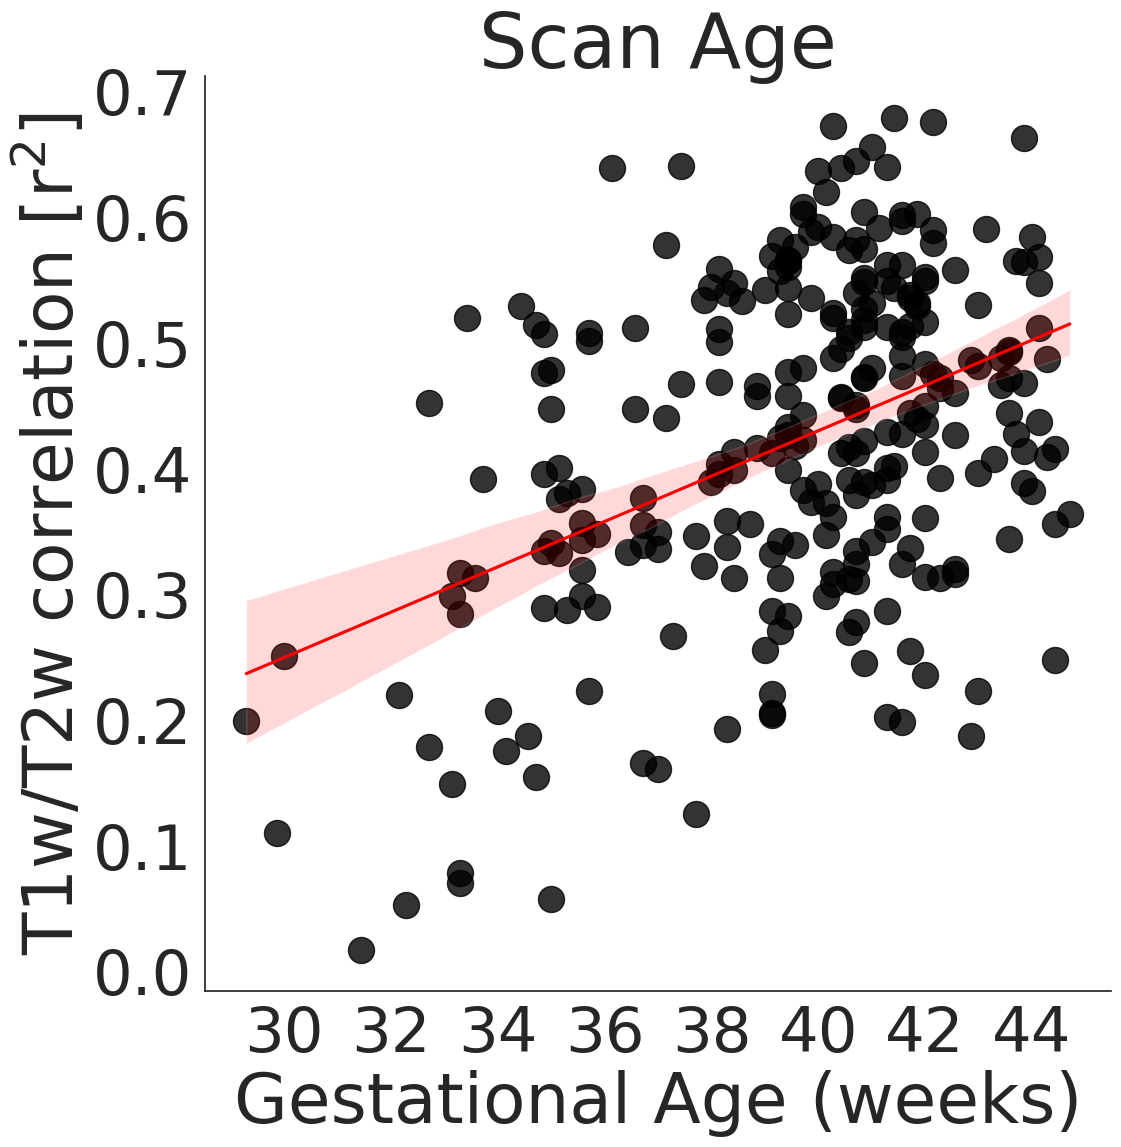

In [43]:
sns.set_style('white');
fig1=sns.lmplot(
    data=FactorAnalyses, x='scan_age', y="r2", scatter_kws={"s": 350, 'color':'black'}, height=10, fit_reg=False, legend=False, 
)
fig1=sns.regplot(data=FactorAnalyses, x='scan_age', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(FactorAnalyses['scan_age'], FactorAnalyses['r2'])
plt.xlabel("Gestational Age (weeks)", fontsize=50)
plt.ylabel("T1w/T2w correlation [r$^{2}$]", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Scan Age', fontsize=55)

#os.makedirs('./figures',exist_ok=True)
plt.savefig('./figures/R2AndScanAge.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=0.4187298888489972, pvalue=5.147115019718866e-13)

Text(0.5, 34.20312499999994, 'Gestational Age (weeks)')

Text(33.0, 0.5, 'T1w/T2w correlation [r$^{2}$]')

([<matplotlib.axis.XTick at 0x7f2032a1a360>,
 [Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Birth Age')

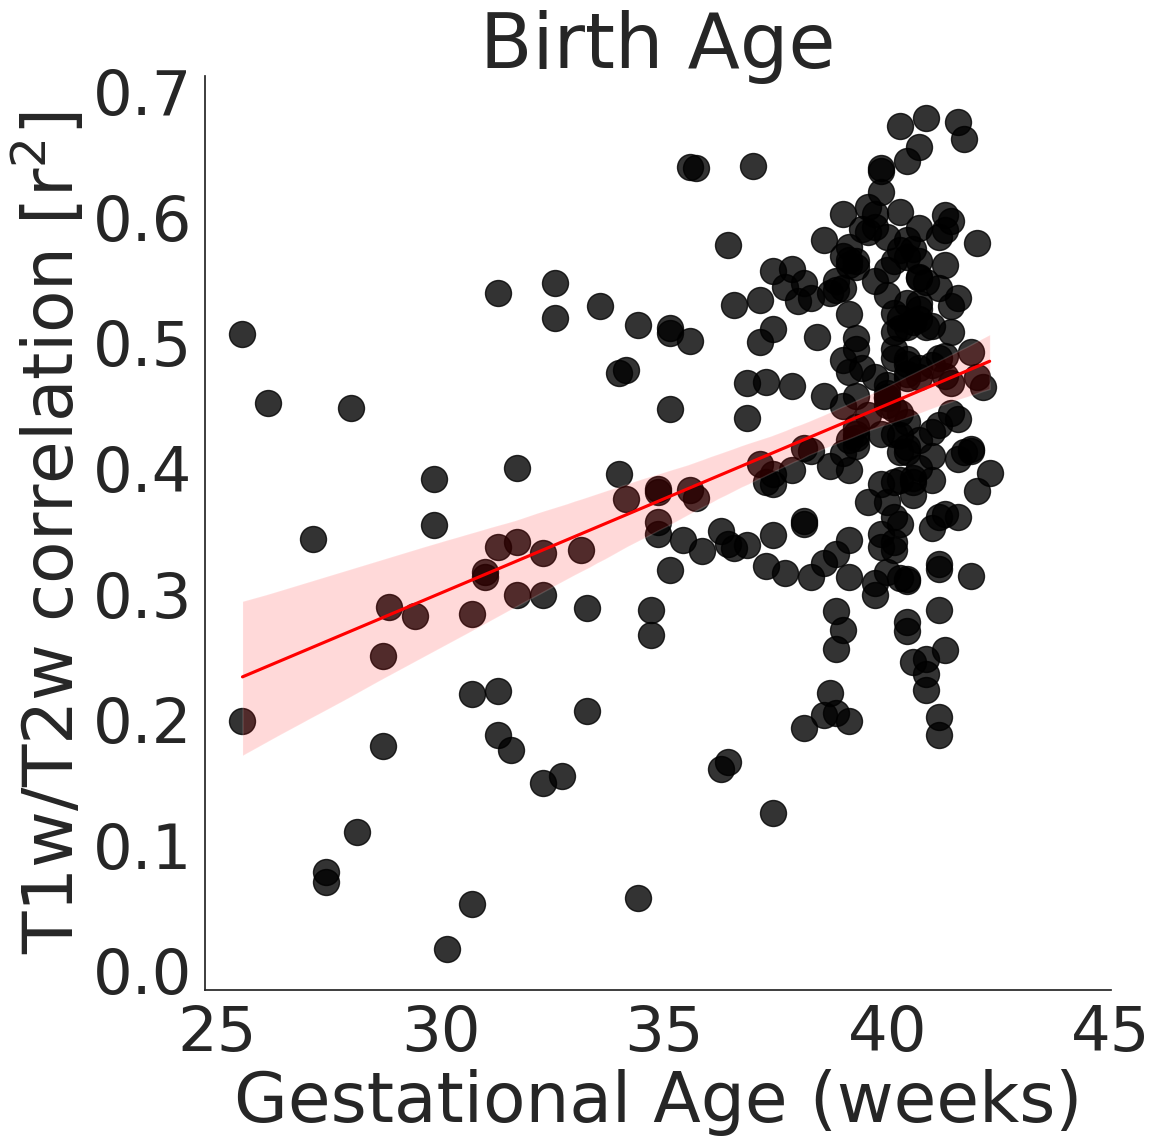

In [42]:
sns.set_style('white');
fig1=sns.lmplot(
    data=FactorAnalyses, x='birth_age', y="r2", scatter_kws={"s": 350, 'color':'black'}, height=10, fit_reg=False, legend=False, 
)
fig1=sns.regplot(data=FactorAnalyses, x='birth_age', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(FactorAnalyses['birth_age'], FactorAnalyses['r2'])
plt.xlabel("Gestational Age (weeks)", fontsize=50)
plt.ylabel("T1w/T2w correlation [r$^{2}$]", fontsize=50)
plt.xticks([25, 30, 35, 40, 45], fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Birth Age', fontsize=55)

#os.makedirs('./figures',exist_ok=True)
plt.savefig('./figures/R2AndBirthAge.png', dpi=600, bbox_inches = "tight")

<Figure size 800x1000 with 0 Axes>

<Axes: xlabel='gender', ylabel='r2'>

Text(0, 0.5, 'T1w/T2w correlation [r$^{2}$]')

([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Sex')

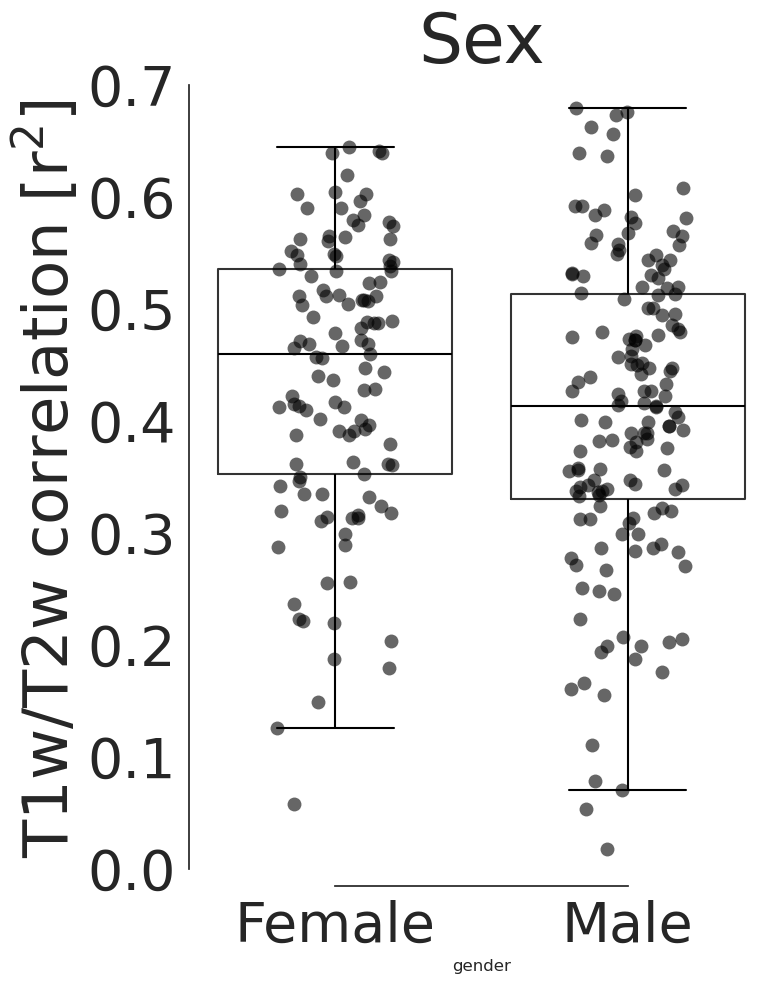

In [41]:
sns.set_theme(style="white")

plt.figure(figsize=(8, 10))
ax = sns.boxplot(
    data=FactorAnalyses,
    x="gender", y="r2",
    fill=False,
    color='black',
    #palette=["#9ecae1", "#fc9272"],
    width=0.8, showfliers=False, boxprops={"alpha": 0.8}
)
sns.stripplot(
    data=FactorAnalyses,
    x="gender", y="r2",
    color="black", size=10, jitter=0.2, alpha=0.6
)

#plt.xlabel("Sex", fontsize=45)
plt.ylabel("T1w/T2w correlation [r$^{2}$]", fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Sex', fontsize=50)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('./figures/R2AndGender.png', dpi=600, bbox_inches = "tight")
plt.show()

In [12]:
from scipy.stats import ttest_ind

male = FactorAnalyses.loc[FactorAnalyses['gender']=='Male', 'r2']
female = FactorAnalyses.loc[FactorAnalyses['gender']=='Female', 'r2']


t_stat, p_val = ttest_ind(male, female, equal_var=False)  # Welch’s t-test
print(f"t = {t_stat:.3f}, p = {p_val:.4f}")

t = -1.876, p = 0.0617


## Behavioral Analyses

PearsonRResult(statistic=0.16963810991856873, pvalue=0.01503036355738203)

Text(0.5, 29.140624999999986, 'Motor Scores')

Text(29.000000000000007, 0.5, 'T1w/T2w correlation [$\\mathregular{r^{2}}$]')

(array([12., 14., 16., 18., 20., 22., 24., 26., 28., 30.]),
 [Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18'),
  Text(20.0, 0, '20'),
  Text(22.0, 0, '22'),
  Text(24.0, 0, '24'),
  Text(26.0, 0, '26'),
  Text(28.0, 0, '28'),
  Text(30.0, 0, '30')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Motor Subscale')

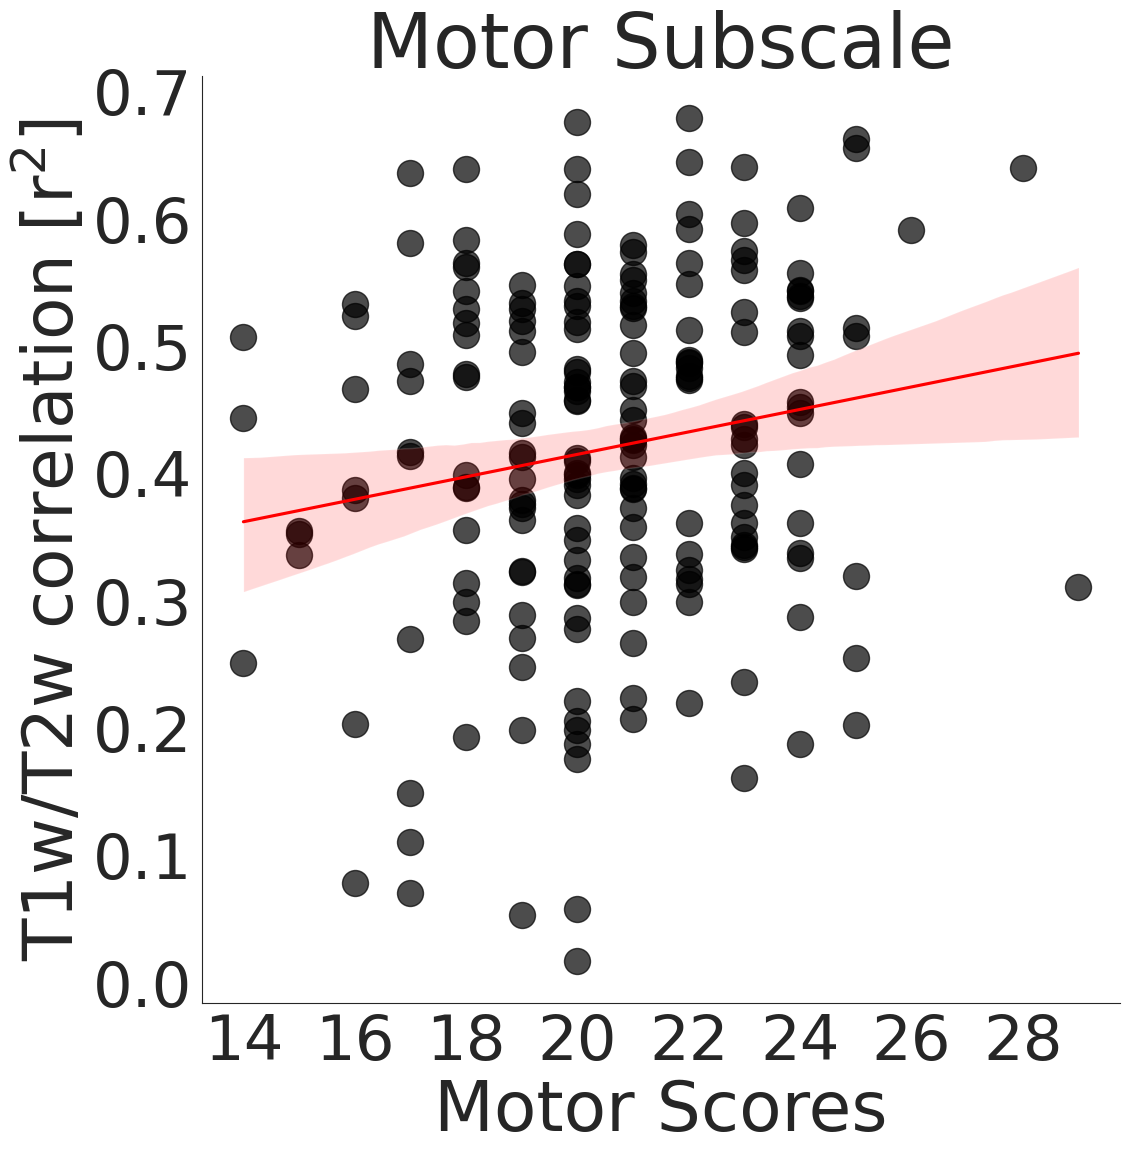

In [11]:
#Motor
sns.set_style('white');
fig1=sns.lmplot(
    data=CleanedMotorScores, x='bsid_mot_sumscaled', y="r2", scatter_kws={"s": 350, "color":"black", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=CleanedMotorScores, x='bsid_mot_sumscaled', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(CleanedMotorScores['bsid_mot_sumscaled'], CleanedMotorScores['r2'])
plt.xlabel("Motor Scores", fontsize=50)
plt.ylabel("T1w/T2w correlation [$\mathregular{r^{2}}$]", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Motor Subscale', fontsize=55)

plt.savefig('./figures/r2_motor_cleaned.png', dpi=600, bbox_inches = "tight")

In [ ]:
import statsmodels.api as sm
import pandas as pd

df=CleanedMotorScores

# Base model
model_base = sm.OLS.from_formula('bsid_mot_sumscaled ~ r2', data=df).fit()

# Alternative models
model_scanAge = sm.OLS.from_formula('bsid_mot_sumscaled ~ r2 + scan_age', data=df).fit()
model_birthAge = sm.OLS.from_formula('bsid_mot_sumscaled ~ r2 + birth_age', data=df).fit()
model_sex = sm.OLS.from_formula('bsid_mot_sumscaled ~ r2 + sex', data=df).fit()

# Compare models using ANOVA (likelihood ratio test)
from statsmodels.stats.anova import anova_lm

anova_scanAge = anova_lm(model_base, model_scanAge)
anova_birthAge = anova_lm(model_base, model_birthAge)
anova_sex = anova_lm(model_base, model_sex)

print("Compare base vs +scanAge:\n", anova_scanAge)
print("Compare base vs +birthAge:\n", anova_birthAge)
print("Compare base vs +sex:\n", anova_sex)


PearsonRResult(statistic=0.10142879454608299, pvalue=0.14392870053631976)

Text(0.5, 34.20312499999994, 'Cognition Scores')

Text(33.0, 0.5, 'T1w/T2w correlation [$\\mathregular{r^{2}}$]')

(array([ 4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Cognition Subscale')

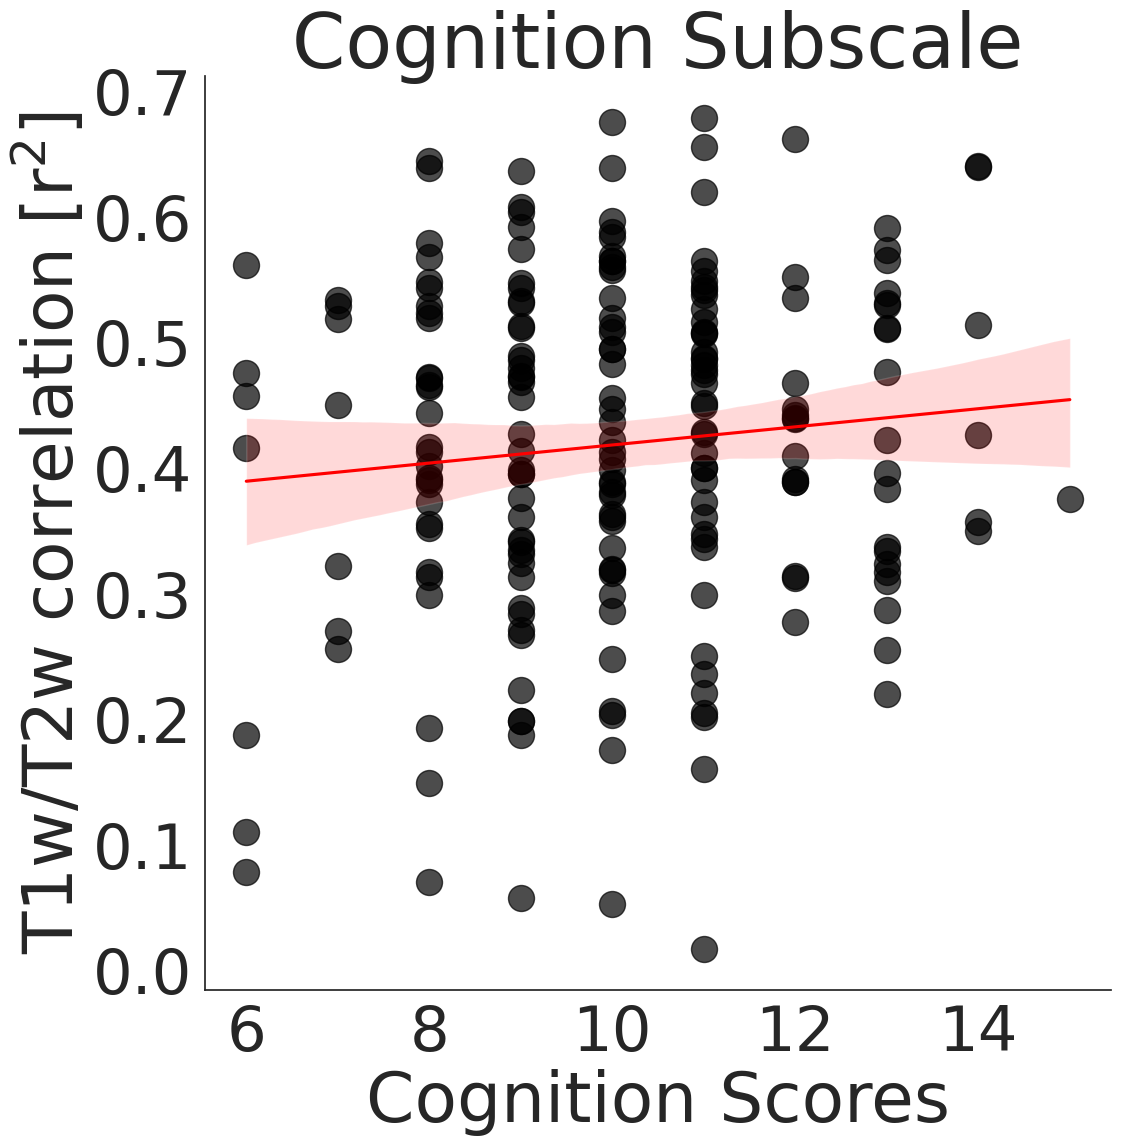

In [30]:
#Motor
sns.set_style('white');
fig1=sns.lmplot(
    data=CleanedCognitionScores, x='bsid_cog_sumscaled', y="r2", scatter_kws={"s": 350, "color":"black", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=CleanedCognitionScores, x='bsid_cog_sumscaled', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(CleanedCognitionScores['bsid_cog_sumscaled'], CleanedCognitionScores['r2'])
#stats.spearmanr(BehavDataAllScoresR2s['bsid_mot_sumscaled'], BehavDataAllScoresR2s['r2'])
plt.xlabel("Cognition Scores", fontsize=50)
plt.ylabel("T1w/T2w correlation [$\mathregular{r^{2}}$]", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Cognition Subscale', fontsize=55)

plt.savefig('./figures/r2_cognition_cleaned.png', dpi=600, bbox_inches = "tight")

PearsonRResult(statistic=0.10955252864629542, pvalue=0.11345358762321663)

Text(0.5, 34.20312499999994, 'Language Scores')

Text(33.0, 0.5, 'T1w/T2w correlation [$\\mathregular{r^{2}}$]')

(array([ 5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40')])

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

Text(0.5, 1.0, 'Language Subscale')

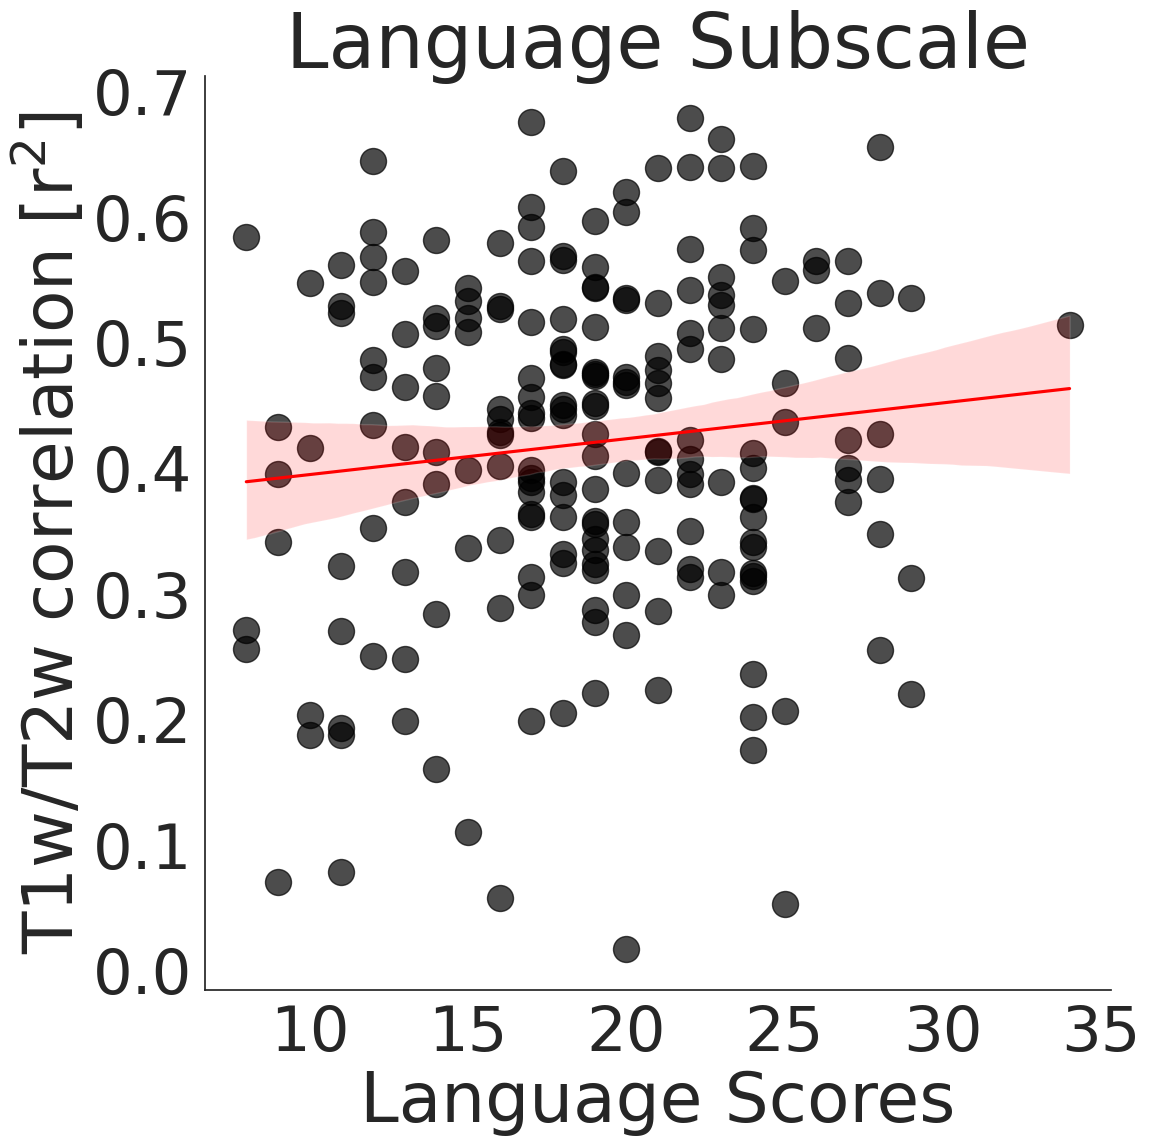

In [32]:
#Motor
sns.set_style('white');
fig1=sns.lmplot(
    data=CleanedLanguageScores, x='bsid_lang_sumscaled', y="r2", scatter_kws={"s": 350, "color":"black", "alpha":0.7}, height=10, fit_reg=False, legend=False)
fig1=sns.regplot(data=CleanedLanguageScores, x='bsid_lang_sumscaled', y="r2", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "red"})
scipy.stats.pearsonr(CleanedLanguageScores['bsid_lang_sumscaled'], CleanedLanguageScores['r2'])
#stats.spearmanr(BehavDataAllScoresR2s['bsid_mot_sumscaled'], BehavDataAllScoresR2s['r2'])
plt.xlabel("Language Scores", fontsize=50)
plt.ylabel("T1w/T2w correlation [$\mathregular{r^{2}}$]", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Language Subscale', fontsize=55)

plt.savefig('./figures/r2_language_cleaned.png', dpi=600, bbox_inches = "tight")